## Descomposición de series temporales

El objetivo de este notebook es descomponer una serie temporal es sus componentes:

1) Componete de tendencia

2) Componente estacionaria

3) Componente de ruido


Usando estas componente podemos realizar una estimación a futuro de la serie asumiendo diferents modelos, aditivo, multiplicativo, etcetera.


In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
plt.rc('xtick', labelsize=20)     
plt.rc('ytick', labelsize=20)

In [2]:
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [5]:
! cat monthly-car-sales-in-quebec-1960.csv

## Bajando un dataset

Trabajaremos con un dataset que puedes escontrar [aquí](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/). Este dataset nos muestra ventas mensuales de coches en Quebec desde 1960 a 1968.


In [34]:
## bajando el dataset
cars_df = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")
cars_df.tail()

,Month,Monthly car sales in Quebec 1960-1968
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0
108,Monthly car sales in Quebec 1960-1968,NaN


## A) Limpiando el dataset

Eliminamos la última fila

In [35]:
cars_df = cars_df.iloc[:-1]

Cambiamos formato de fechas para que se visualice mejor

In [36]:
cars_df["dt"] = cars_df["Month"].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m'))

Cambiamos nombre de la columna `Monthly car sales in Quebec 1960-1968` for just `sales`  y eliminamos la columna `Month`.

In [37]:
cars_df = cars_df\
    .rename({"Monthly car sales in Quebec 1960-1968": "sales"}, axis=1)\
    .drop("Month", axis=1)
cars_df.tail()

,sales,dt
103,16722.0,1968-08-01
104,14385.0,1968-09-01
105,21342.0,1968-10-01
106,17180.0,1968-11-01
107,14577.0,1968-12-01


 Verificamos que no tenemos datos faltantes: 12 datos por año

In [45]:
## WRITE YOUR CODE


cars_df["year"] = cars_df["dt"].dt.year.values
cars_df.groupby("year").count()["dt"]

year
1960    12
1961    12
1962    12
1963    12
1964    12
1965    12
1966    12
1967    12
1968    12
Name: dt, dtype: int64

In [53]:
cars_df = cars_df.set_index("dt")

Dibujamos la serie temporal

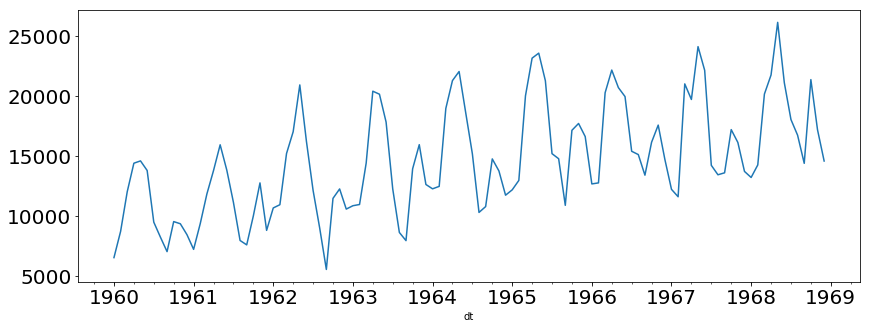

In [54]:
# WRIE YOUR CODE
fig,ax=plt.subplots(1,1,figsize=(17,17))

cars_df['sales'].plot(figsize=(14,5),ax=ax)




In [ ]:
cars_df = cars_df.reset_index("dt")

**Nota:**

Observando el plot se ve claramente que es una serie no estacionaria
con tendencia positiva y con periodos estacionales de un año.

Presuponemos claramente que el modelo es aditivo:

$X_t = E_t + T_t + I_t$

### 1) Desestacionalización de la serie

La clave es buscar el periodo y restarselo.

In [176]:
N_lags = 12

cols=[]
cols.append("sales")
Xy = cars_df[["dt", "sales"]]

def create_lags(Xy, n_lags):
    
    Xy_with_lags = Xy.sort_values('dt').copy()
    for i in range(1, n_lags+1):
        Xy_with_lags['sales-'+str(i)] = Xy_with_lags['sales'].shift(i)
        cols.append("sales-"+str(i))

    return Xy_with_lags

Xy_with_lags = create_lags(Xy, N_lags).iloc[N_lags:]
Xy_with_lags.head()

,dt,sales,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,sales-8,sales-9,sales-10,sales-11,sales-12
12,1961-01-01,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,12026.0,8728.0,6550.0
13,1961-02-01,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,12026.0,8728.0
14,1961-03-01,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,12026.0
15,1961-04-01,13784.0,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0
16,1961-05-01,15926.0,13784.0,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0


In [177]:
Xy_with_lags["diff"] = Xy_with_lags["sales"]-Xy_with_lags["sales-{}".format(N_lags)]
Xy_with_lags

,dt,sales,sales-1,sales-2,sales-3,sales-4,sales-5,sales-6,sales-7,sales-8,sales-9,sales-10,sales-11,sales-12,diff
12,1961-01-01,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,12026.0,8728.0,6550.0,687.0
13,1961-02-01,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,12026.0,8728.0,646.0
14,1961-03-01,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,12026.0,-189.0
15,1961-04-01,13784.0,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,14395.0,-611.0
16,1961-05-01,15926.0,13784.0,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,14587.0,1339.0
17,1961-06-01,13821.0,15926.0,13784.0,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,13791.0,30.0
18,1961-07-01,11143.0,13821.0,15926.0,13784.0,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,9498.0,1645.0
19,1961-08-01,7975.0,11143.0,13821.0,15926.0,13784.0,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,8251.0,-276.0
20,1961-09-01,7610.0,7975.0,11143.0,13821.0,15926.0,13784.0,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,7049.0,561.0
21,1961-10-01,10015.0,7610.0,7975.0,11143.0,13821.0,15926.0,13784.0,11837.0,9374.0,7237.0,8456.0,9364.0,9545.0,470.0


Text(0.5,1,'Serie desestacionalizada')

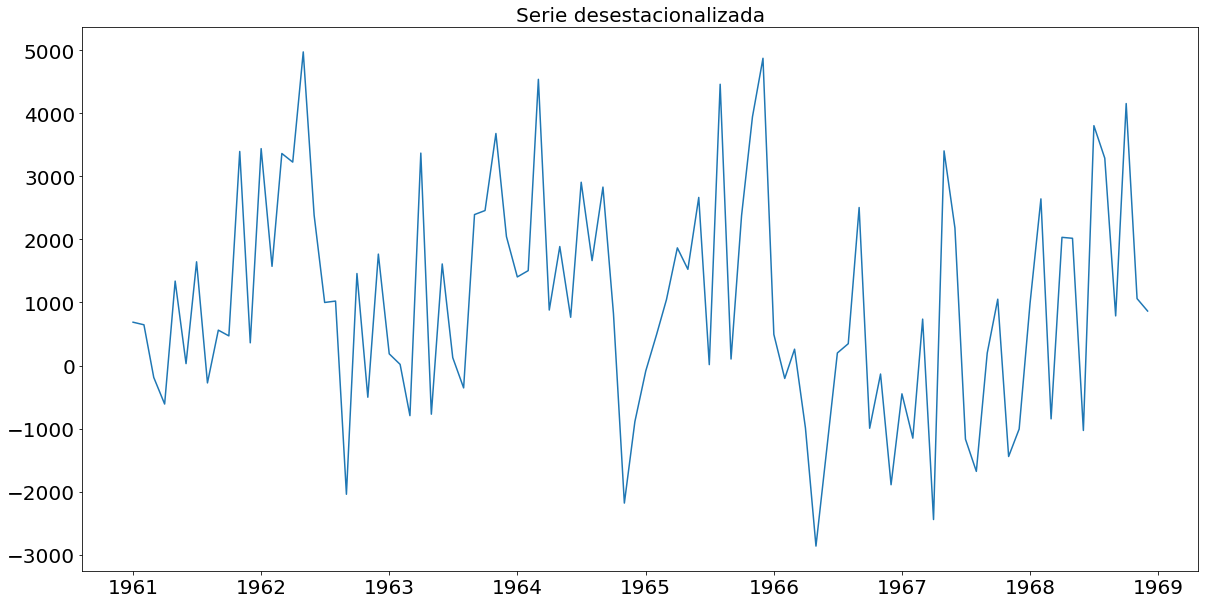

In [178]:
plt.plot(Xy_with_lags["dt"], Xy_with_lags["diff"])
plt.title("Serie desestacionalizada",size=20)

2) Moving average

In [179]:
# CALCULA LA COMPONENTE DE TENDENCIA COMO MEDIA DEL PERIODO ELEGIDO




In [180]:
Xy_with_lags['mean'] = Xy_with_lags[cols].drop("sales-{}".format(N_lags)
                                        , axis=1).mean(axis=1)

#Xy_with_lags['mean'] = Xy_with_lags[cols].mean(axis=1)

Text(0.5,1,'Evolución mensual de la venta de coches desde 1960 a 1968')

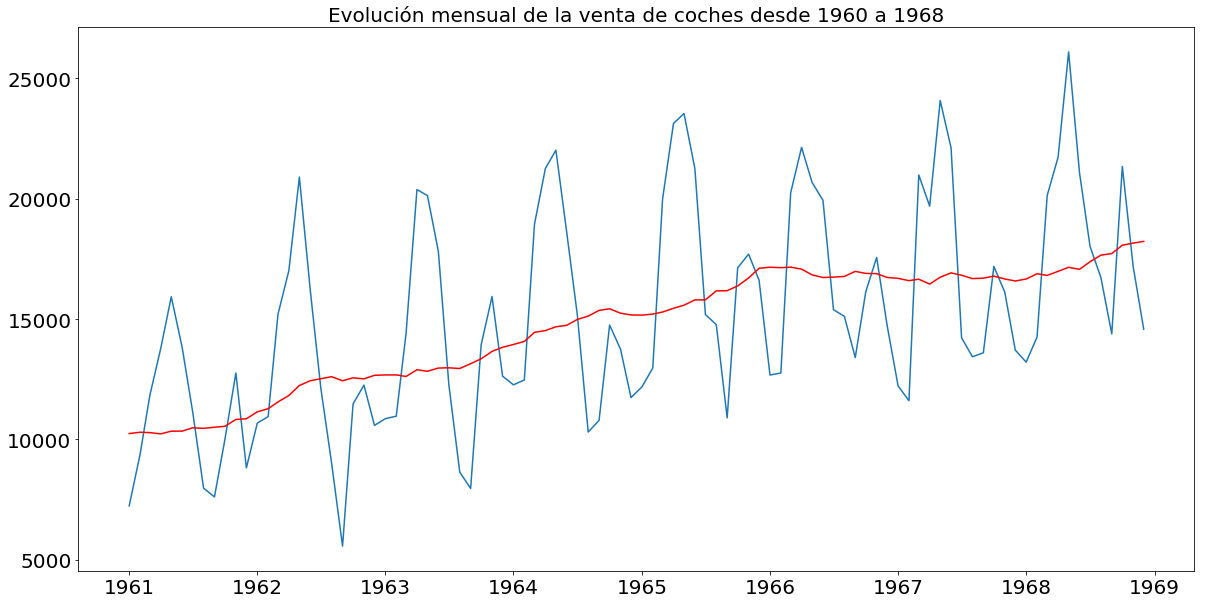

In [181]:
plt.plot(Xy_with_lags["dt"], Xy_with_lags["sales"])
plt.plot(Xy_with_lags["dt"], Xy_with_lags["mean"],color="red")
plt.title("Evolución mensual de la venta de coches desde 1960 a 1968",size=20)

Text(0.5,1,'Evolución mensual de la venta de coches desde 1960 a 1968')

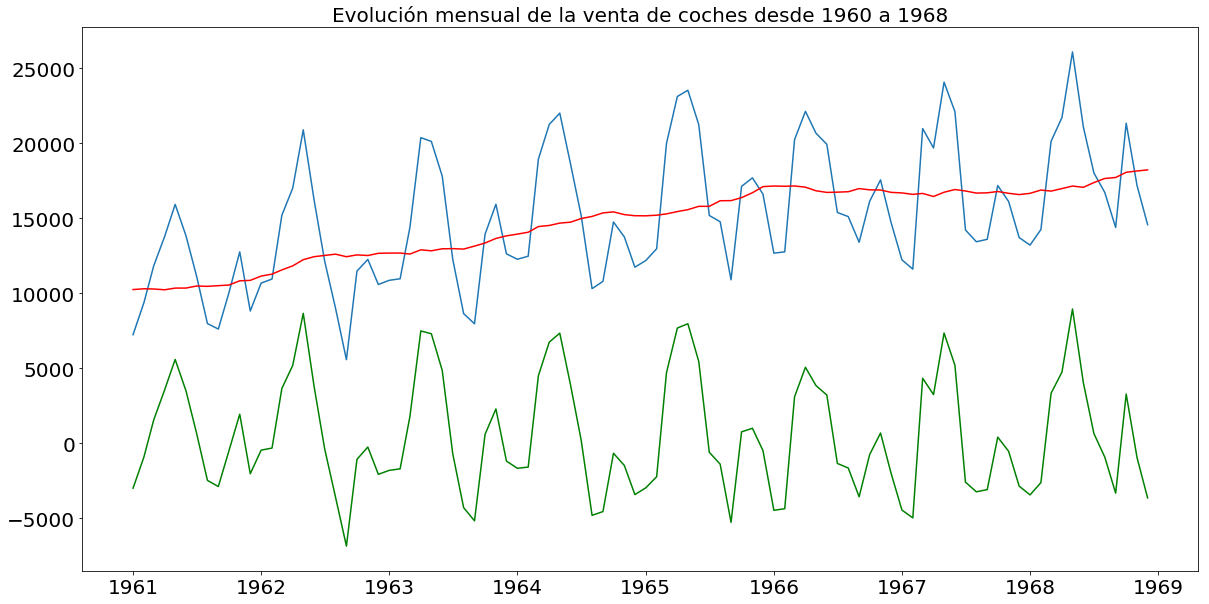

In [182]:
plt.plot(Xy_with_lags["dt"], Xy_with_lags["sales"])
plt.plot(Xy_with_lags["dt"], Xy_with_lags["mean"],color="red")
plt.plot(Xy_with_lags["dt"], Xy_with_lags["sales"]-Xy_with_lags["mean"],color="green")
plt.title("Evolución mensual de la venta de coches desde 1960 a 1968",size=20)

In [343]:
Xy_with_lags['seasonal'] = Xy_with_lags["sales"] - Xy_with_lags["mean"]
Xy_with_lags['month'] = Xy_with_lags["dt"].dt.month
Xy_seasons = Xy_with_lags[['month', 'seasonal']].copy()
#Xy_seasons_m12 = Xy_with_lags[['month', 'seasonal']].copy()
#Xy_seasons_m12["month"] = Xy_seasons_m12["month"] - 12
#Xy_seasons_12 = Xy_with_lags[['month', 'seasonal']].copy()
#Xy_seasons_12["month"] = Xy_seasons_12["month"] + 12
#Xy_seasons = pd.concat([Xy_seasons, Xy_seasons_m12, Xy_seasons_12])\
#    .query("month ")

Optimiza la componente seasonal con una función polinómica

In [344]:
max_degree = 7
for i in range(2, max_degree + 1):
    Xy_seasons['month'+str(i)] =  Xy_seasons['month']**i

In [345]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Xy_seasons.drop(['seasonal'],axis=1),Xy_seasons['seasonal'])
seasonal_hat = reg.predict([[month**i for i in range(1, max_degree+1)] 
                 for month in range(1, 13)])
seasonal_hat_df = pd.DataFrame({
        'month': range(1, 13),
        'seasonal_hat': seasonal_hat
    })

In [346]:
[[month**i for i in range(1, max_degree+1)] 
                 for month in range(1, 13)]

[[1, 1, 1, 1, 1, 1, 1],
 [2, 4, 8, 16, 32, 64, 128],
 [3, 9, 27, 81, 243, 729, 2187],
 [4, 16, 64, 256, 1024, 4096, 16384],
 [5, 25, 125, 625, 3125, 15625, 78125],
 [6, 36, 216, 1296, 7776, 46656, 279936],
 [7, 49, 343, 2401, 16807, 117649, 823543],
 [8, 64, 512, 4096, 32768, 262144, 2097152],
 [9, 81, 729, 6561, 59049, 531441, 4782969],
 [10, 100, 1000, 10000, 100000, 1000000, 10000000],
 [11, 121, 1331, 14641, 161051, 1771561, 19487171],
 [12, 144, 1728, 20736, 248832, 2985984, 35831808]]

In [353]:
Xy_with_lags_total = Xy_with_lags.merge(seasonal_hat_df).sort_values('dt')
Xy_seasons.drop(['seasonal'],axis=1)

,month,month2,month3,month4,month5,month6,month7
12,1,1,1,1,1,1,1
13,2,4,8,16,32,64,128
14,3,9,27,81,243,729,2187
15,4,16,64,256,1024,4096,16384
16,5,25,125,625,3125,15625,78125
17,6,36,216,1296,7776,46656,279936
18,7,49,343,2401,16807,117649,823543
19,8,64,512,4096,32768,262144,2097152
20,9,81,729,6561,59049,531441,4782969
21,10,100,1000,10000,100000,1000000,10000000


In [351]:
seasonal_2 = reg.predict(Xy_seasons.drop(['seasonal'],axis=1))
seasonal_2

array([-2862.28068743, -1945.28032349,  2450.57432659,  6355.32351433,
        6931.58735903,  4001.02114954,  -358.13058903, -3335.21396829,
       -3225.91225368,  -778.39172998,   760.32037996, -2295.10676088,
       -2862.28068743, -1945.28032349,  2450.57432659,  6355.32351433,
        6931.58735903,  4001.02114954,  -358.13058903, -3335.21396829,
       -3225.91225368,  -778.39172998,   760.32037996, -2295.10676088,
       -2862.28068743, -1945.28032349,  2450.57432659,  6355.32351433,
        6931.58735903,  4001.02114954,  -358.13058903, -3335.21396829,
       -3225.91225368,  -778.39172998,   760.32037996, -2295.10676088,
       -2862.28068743, -1945.28032349,  2450.57432659,  6355.32351433,
        6931.58735903,  4001.02114954,  -358.13058903, -3335.21396829,
       -3225.91225368,  -778.39172998,   760.32037996, -2295.10676088,
       -2862.28068743, -1945.28032349,  2450.57432659,  6355.32351433,
        6931.58735903,  4001.02114954,  -358.13058903, -3335.21396829,
      

In [352]:
Xy_with_lags_total['residual'] = Xy_with_lags_total['seasonal']-Xy_with_lags_total['seasonal_hat']

print(Xy_with_lags_total['residual'].mean())

8.419647201662883e-10


Text(0.5,1,'Evolución mensual de la venta de coches desde 1960 a 1968')

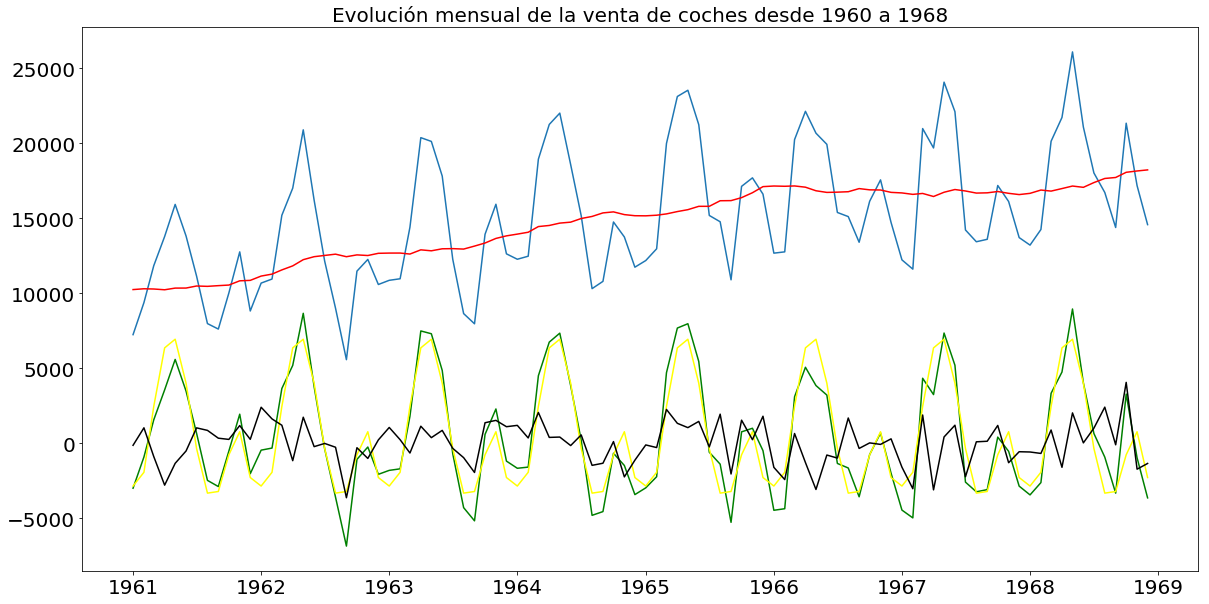

In [350]:
## WRITE YOUR CODE
plt.plot(Xy_with_lags["dt"], Xy_with_lags["sales"])
plt.plot(Xy_with_lags["dt"], Xy_with_lags["mean"],color="red")
plt.plot(Xy_with_lags["dt"], Xy_with_lags["sales"]-Xy_with_lags["mean"],color="green")
plt.plot(Xy_with_lags["dt"], seasonal_2,color="yellow")
plt.plot(Xy_with_lags["dt"], Xy_with_lags_total['residual'],color="black")


plt.title("Evolución mensual de la venta de coches desde 1960 a 1968",size=20)

Dibuja las 3 componentes y la serie de tiempos en un mismmo plot

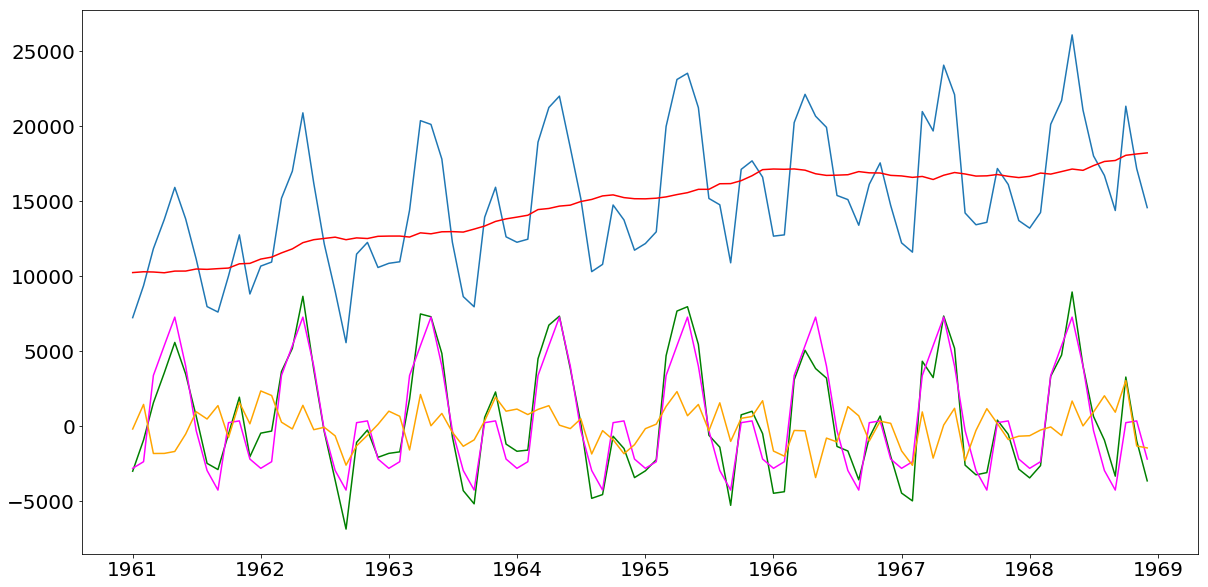

Text(0,0.5,'ruido')

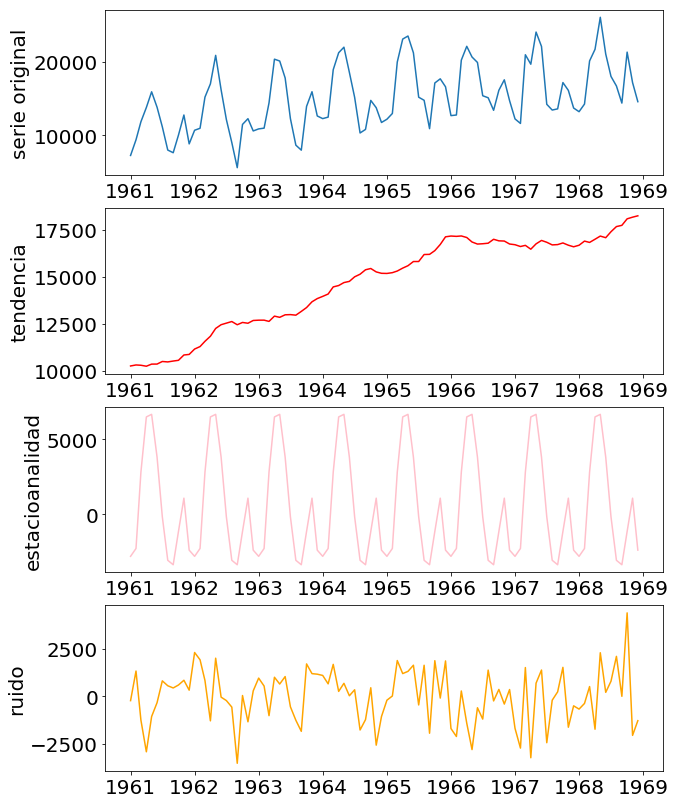

In [317]:
fig,ax = plt.subplots(nrows=4, ncols=1,figsize=(10,14))
ax[0].plot(Xy_with_lags_total["dt"], Xy_with_lags_total["sales"])
ax[0].set_ylabel("serie original",size=20)
ax[1].plot(Xy_with_lags_total["dt"], Xy_with_lags_total["mean"],color="red")
ax[1].set_ylabel("tendencia",size=20)
ax[2].plot(Xy_with_lags_total["dt"], Xy_with_lags_total["seasonal_hat"],color='pink')
ax[2].set_ylabel("estacioanalidad",size=20)
ax[3].plot(Xy_with_lags_total["dt"], Xy_with_lags_total["residual"],color='orange')
ax[3].set_ylabel("ruido",size=20)

## Descomposición de una serie de tiempo  usando un paquete de python

In [318]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

In [321]:
series = Xy.set_index('dt')
result = seasonal_decompose(series, model='multiplicative')

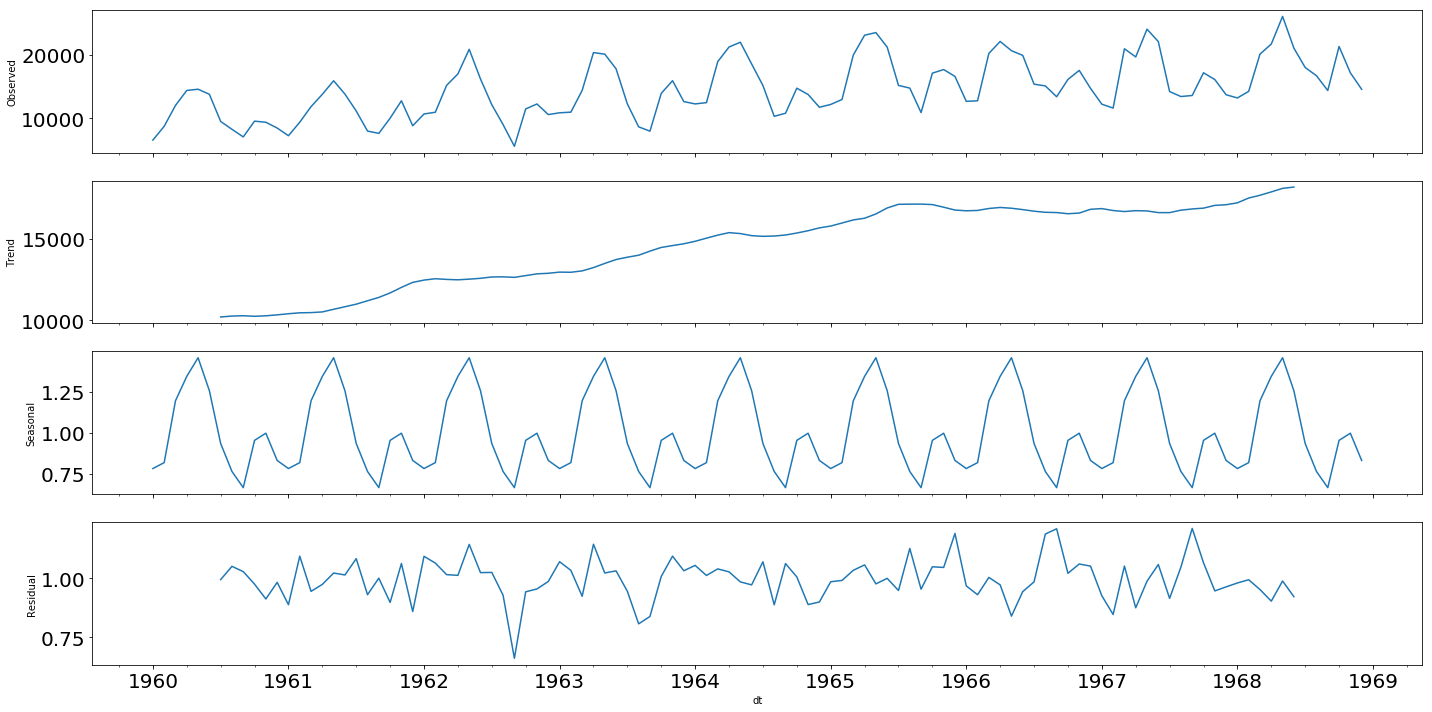

In [354]:
result.plot()
pyplot.show()

In [356]:
import pprint

pprint.pprint(result)